In [1]:
!pip install mlxtend

### <center><h1> Ensembling & Random Forest </h1></center>

## Explainer Video

In [4]:
from IPython.display import HTML

HTML('<iframe src="https://player.vimeo.com/video/282304297" width="800" height="600" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe>'
)

In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, make_scorer,mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor,BaggingRegressor
from sklearn.linear_model import LinearRegression
import math
from mlxtend.regressor import StackingRegressor
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Loading the house prices dataset for the mini-challenge
df = pd.read_csv('graduate-admissions/Admission_Predict.csv')
df=df.rename(columns = {'Chance of Admit ':'Chance of Admit'})
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

# Ensemble Methods

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 1
***
### Instructions
* Split the dataset into features and target variable(`Chance of Admit`) then split it into train and test.

In [6]:
X = df.drop('Chance of Admit', axis = 1)
y = df['Chance of Admit']
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size =0.2,random_state = 5)

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
249         250        321          111                  3  3.5   4.0  8.83   
42           43        313          107                  2  2.5   2.0  8.50   
297         298        320          120                  3  4.0   4.5  9.11   
127         128        319          112                  3  2.5   2.0  8.71   
56           57        316          102                  3  2.0   3.0  7.40   

     Research  
249         1  
42          1  
297         0  
127         1  
56          0

In [10]:
train_y.head()

249    0.77
42     0.53
297    0.86
127    0.78
56     0.64
Name: Chance of Admit, dtype: float64

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 2
***
### Instructions
### Decision Tree
* Fit a Decision tree model on the above data and predict on the test data and calculate the r2 score

In [11]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [42]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(train_x,train_y)
    Accuracy = dt.score(test_x,test_y)

In [43]:
print('Decison Tree Accuracy',Accuracy)

Decison Tree Accuracy 0.6158235394311021


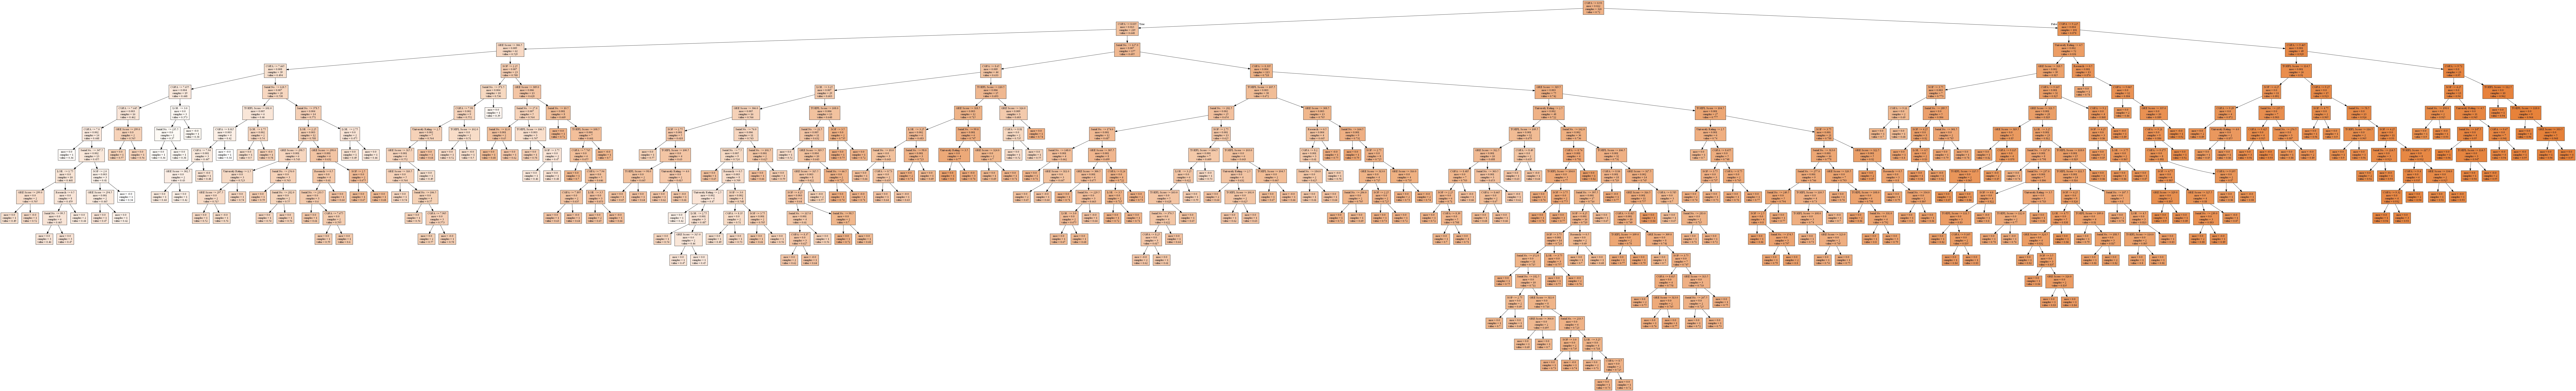

In [45]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=train_x.columns, filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 3
***
### Instructions
### Bagging
* Fit a Bagging model(i.e resampling with replacement) on the above data and predict on the test data and calculate the r2 score.Pass the parameter `base_estimator= DecisionTreeRegressor()`, `n_estimators=20` , `max_samples=100` and `random_state=0`

In [48]:
dt2 = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=0),n_estimators=20,max_samples=100,random_state=0,oob_score=True)
dt2.fit(train_x,train_y)
dt2.score(test_x,test_y)

0.7521067535343213

In [49]:
dt2.oob_score_

0.8248928939561073

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 4
***
### Instructions
### Pasting
* Fit a Bagging model(i.e resampling without replacement) on the above data and predict on the test data and calculate the r2 score. Pass the parameter `base_estimator= DecisionTreeRegressor`, `n_estimators=100` , `max_samples=100`, `bootstrap=False` and `random_state=0`

In [50]:
dt3 = BaggingRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100,max_samples=100,bootstrap=False,random_state=0,verbose=True)
dt3.fit(train_x,train_y)
dt3.score(test_x,test_y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


0.7348148441492084

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 5
***
### Instructions
### Random Forest
* Fit a Random Forest regressor on the above data and predict on the test data and calculate the r2 score. Pass the parameter `random_state=9`

In [55]:
dt4 = RandomForestRegressor(random_state=9)
dt4.fit(train_x,train_y)
dt4.score(test_x,test_y)

0.69542071197411

In [59]:
feature_import = pd.Series(dict(sorted(dict(zip(train_x,dt4.feature_importances_)).items(),key = lambda x : x[1], reverse =True)))

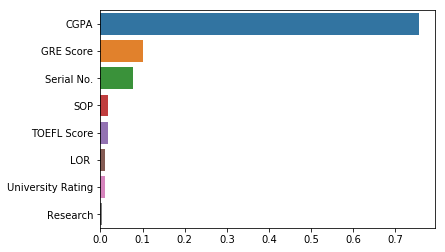

In [61]:
import seaborn as sns
sns.barplot(y = feature_import.index,x =feature_import.values)

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 6
***
### Instructions
### Random Forest tuned with GridSearchCV
* Fit a RandomForest Regressor with `random_state=9` and tune the parameters using GridSearchCV. Search for the best set of features amongst the following list of features and their value.`'n_estimators': [10,20,30],'max_depth': [6,8],'min_samples_split': [6,8]`

In [51]:
param_grid = {'n_estimators' : [10,20,30],
               'max_depth': [6,8],
               'min_samples_split' : [6,8]}
clf = RandomForestRegressor(random_state=9)
grid_search = GridSearchCV(clf, param_grid = param_grid,verbose =2)
grid_search.fit(train_x,train_y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] max_depth=6, min_samples_split=6, n_estimators=10 ...............
[CV]  max_depth=6, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_split=6, n_estimators=10 ...............
[CV]  max_depth=6, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_split=6, n_estimators=10 ...............
[CV]  max_depth=6, min_samples_split=6, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_split=6, n_estimators=20 ...............
[CV]  max_depth=6, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=6, min_samples_split=6, n_estimators=20 ...............
[CV]  max_depth=6, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=6, min_samples_split=6, n_estimators=20 ...............
[CV]  max_depth=6, min_samples_split=6, n_estimators=20, total=   0.0s
[CV] max_depth=6, min_samples_split=6, n_estimators=30 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=6, min_samples_split=6, n_estimators=30, total=   0.0s
[CV] max_depth=6, min_samples_split=6, n_estimators=30 ...............
[CV]  max_depth=6, min_samples_split=6, n_estimators=30, total=   0.0s
[CV] max_depth=6, min_samples_split=6, n_estimators=30 ...............
[CV]  max_depth=6, min_samples_split=6, n_estimators=30, total=   0.0s
[CV] max_depth=6, min_samples_split=8, n_estimators=10 ...............
[CV]  max_depth=6, min_samples_split=8, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_split=8, n_estimators=10 ...............
[CV]  max_depth=6, min_samples_split=8, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_split=8, n_estimators=10 ...............
[CV]  max_depth=6, min_samples_split=8, n_estimators=10, total=   0.0s
[CV] max_depth=6, min_samples_split=8, n_estimators=20 ...............
[CV]  max_depth=6, min_samples_split=8, n_estimators=20, total=   0.0s
[CV] max_depth=6, min_samples_split=8, n_estimators=20 ...............
[CV]  

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    1.5s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=9, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30], 'max_depth': [6, 8], 'min_samples_split': [6, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [31]:
grid_search.score(test_x,test_y)

0.7225121682891963

In [33]:
grid_search.best_score_

0.8229973119483702

In [34]:
grid_search.best_params_

{'max_depth': 8, 'min_samples_split': 8, 'n_estimators': 10}

In [53]:
model =  grid_search.best_estimator_

In [54]:
model.score(test_x,test_y)

0.7225121682891963

<img src="../images/icon/ppt-icons.png" alt="Concept-Alert" style="width: 100px;float:left; margin-right:15px"/>
<br /> 

##  Mini-Challenge - 7
***
### Instructions
### Stacking
* Stack the below models(i.e `regressor1,regressor2,regressor3,regressor4`) and predict on the test data.
* Use the Stacking() from mlxtend to initialize a stacking Regressor object. Pass the `regressor_list` to parameter `regressors` and `lin_reg` as `meta_regressor` parameter , while initializing the object.

In [38]:
regressor1 = dt
regressor2 = dt2
regressor3 = dt3
regressor4 = dt4
regressor_list = [regressor1,regressor2,regressor3,regressor4]
lin_reg = LinearRegression()
stack = StackingRegressor(regressors=regressor_list,meta_regressor=lin_reg)

In [39]:
stack.fit(train_x,train_y)
stack.score(test_x,test_y)

0.6158235394311022